<a href="https://colab.research.google.com/github/Tantatorn-dev/boku-no-notebooks/blob/master/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Recognizer
Learn computer vision fundamentals with the famous MNIST data. This is beginner competition in [Kaggle](https://www.kaggle.com/c/digit-recognizer). 

# Get the data
Download dataset from Kaggle.

In [ ]:
# config environment
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/Kaggle"

In [1]:
%cd /content/drive/My Drive/Kaggle/digit

/content/drive/My Drive/Kaggle/digit


In [ ]:
!kaggle competitions download -c digit-recognizer

 55% 5.00M/9.16M [00:00<00:00, 44.2MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.6MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 33.3MB/s]
 82% 5.00M/6.09M [00:00<00:00, 49.8MB/s]
100% 6.09M/6.09M [00:00<00:00, 55.9MB/s]


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  test.csv.zip
  inflating: test.csv                

2 archives were successfully processed.


# Prepare a Dataset
มาดูข้อมูลกันหน่อย ว่าหน้าตาเป็นอย่างไร

In [2]:
# read dataset as Pandas dataframe
import pandas as pd

train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# seperate label from image matrix
def extract_data(df):
  y = df['label'].values
  X = df.loc[:, df.columns != 'label'].values
  return X,y

X,y = extract_data(train_data)

In [5]:
# reshape 
import numpy as np

X = np.reshape(X, (42000,28,28,1))
X.shape

(42000, 28, 28, 1)

In [6]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [7]:
# perform one hot encoding to y data
import tensorflow as tf

y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)

print(y_train.shape)
print(y_test.shape)

(28140, 10)
(13860, 10)


In [10]:
print(X_train[0].shape)
print(X_test.shape)
print(y_test.shape)

(28, 28, 1)
(13860, 28, 28, 1)
(13860, 10)


# Model
Let's create a Deep Learning model by using Keras

In [12]:
# define our model
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [14]:
# let's fit our model

history = model.fit(X_train,y_train ,epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
880/880 [==============================] - 20s 23ms/step - loss: 0.3948 - acc: 0.8942 - val_loss: 0.1800 - val_acc: 0.9442
Epoch 2/100
880/880 [==============================] - 19s 22ms/step - loss: 0.1271 - acc: 0.9613 - val_loss: 0.1568 - val_acc: 0.9516
Epoch 3/100
880/880 [==============================] - 19s 22ms/step - loss: 0.0890 - acc: 0.9721 - val_loss: 0.1050 - val_acc: 0.9695
Epoch 4/100
880/880 [==============================] - 19s 22ms/step - loss: 0.0788 - acc: 0.9758 - val_loss: 0.1016 - val_acc: 0.9688
Epoch 5/100
880/880 [==============================] - 19s 21ms/step - loss: 0.0627 - acc: 0.9794 - val_loss: 0.1116 - val_acc: 0.9693
Epoch 6/100
880/880 [==============================] - 19s 21ms/step - loss: 0.0593 - acc: 0.9810 - val_loss: 0.1096 - val_acc: 0.9684
Epoch 7/100
880/880 [==============================] - 19s 22ms/step - loss: 0.0526 - acc: 0.9835 - val_loss: 0.0999 - val_acc: 0.9748
Epoch 8/100
880/880 [==============================] - 

# Evaluation
Let's see our model works well on test data

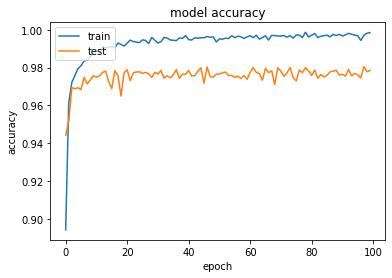

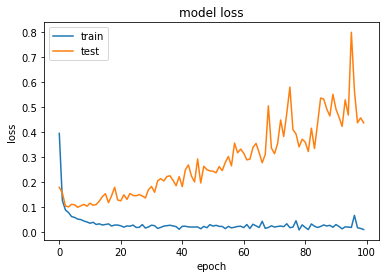

In [15]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Let's validate with test.csv

In [26]:
# read a file

validate_data = pd.read_csv("test.csv")
X_validate = validate_data.values
X_validate = np.reshape(X_validate, (28000,28,28,1))

#check shape
X_validate.shape

(28000, 28, 28, 1)

In [36]:
result = model.predict(X_validate)
result

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [37]:
# turn one hot to label
result = tf.argmax(result,axis=1)
result

<tf.Tensor: shape=(28000,), dtype=int64, numpy=array([2, 0, 9, ..., 3, 9, 2])>

In [39]:
# turn tensor to numpy array
result = result.numpy()
result

array([2, 0, 9, ..., 3, 9, 2])

In [48]:
# let's create new dataframe
output = {'ImageId':[i for i in range(1,len(result)+1)],'Label':result}
output_df = pd.DataFrame(output)
output_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [49]:
# write out to csv file
output_df.to_csv('submission.csv')